# Multiple Regression

Multiple regression is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

Take a look at the data set below, it contains some information about cars.

In [6]:
import pandas

df = pandas.read_csv("data.csv")
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


The table head consists of five columns that describe different attributes of various car models. The meaning of each column is as follows:

- **Car**: The name of the car manufacturer, such as Toyota, Mitsubishi, Skoda, etc.
- **Model**: The specific model of the car, such as Aygo, Space Star, Citigo, etc.
- **Volume**: The engine displacement of the car in cubic centimeters (cc), which measures the volume of the cylinders in the engine. A higher volume usually means more power and higher fuel consumption.
- **Weight**: The curb weight of the car in kilograms (kg), which is the total weight of the car without passengers or cargo. A heavier car usually means lower acceleration and higher fuel consumption.
- **CO2**: The carbon dioxide (CO2) emission of the car in grams per kilometer (g/km), which is a measure of how much greenhouse gas the car produces when driving. A higher CO2 emission usually means more environmental impact and higher fuel tax.

We can predict the CO2 emission of a car based on the size of the engine, but with multiple regression we can throw in more variables, like the weight of the car, to make the prediction more accurate.

In [7]:
import pandas
from sklearn import linear_model

# Read the data from a CSV file and store it in a pandas DataFrame object called df
df = pandas.read_csv("data.csv")

# Select the columns "Weight" and "Volume" from the DataFrame and assign them to a variable called X
# X is a two-dimensional array that contains the independent variables (features) that we want to use to predict the CO2 emission
X = df[["Weight", "Volume"]]
# Select the column "CO2" from the DataFrame and assign it to a variable called y
# y is a one-dimensional array that contains the dependent variable (target) that we want to predict based on the features
y = df["CO2"]

# Import the linear_model module from sklearn, which provides various methods for linear regression
from sklearn import linear_model

# Create an instance of the LinearRegression class and assign it to a variable called regr
# regr is an object that can perform linear regression analysis using the fit() and predict() methods
regr = linear_model.LinearRegression()
# Call the fit() method on the regr object and pass X and y as arguments
# This method will find the best linear equation that fits the data in X and y, and store the coefficients and intercept of the equation in the regr object
regr.fit(X, y)

# Now that we have a trained regr object, we can use it to make predictions for new data
# Call the predict() method on the regr object and pass a list of lists as an argument
# Each sublist represents a new data point with two features: weight and volume
# The predict() method will return an array of predicted CO2 values for each data point
# For example, we can predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

# Print the predicted CO2 value for this car
print(predictedCO2)

# The regr object also stores the coefficients and intercept of the linear equation that it found
# The coefficients are the factors that multiply each feature in the equation, and represent how much each feature affects the prediction
# The intercept is the constant term that is added to the equation, and represents the baseline prediction when all features are zero
# We can access these values using the coef_ and intercept_ attributes of the regr object
# For example, we can print the coefficient of weight and volume as follows:
coefficient = regr.coef_
print(coefficient)

# The coefficient array tells us that if we increase the weight by 1kg, the CO2 emission increases by 0.00755095 g/km
# And if we increase the volume by 1 cm3, the CO2 emission increases by 0.00780526 g/km
# We can use this information to calculate how much CO2 emission would change if we change one feature while keeping the other constant
# For example, if we increase the weight by 1000kg while keeping the volume at 1300cm3, we can expect the CO2 emission to increase by 1000 * 0.00755095 = 7.55095 g/km
predictedCO2_other = regr.predict([[3300, 1300]])
print(predictedCO2 + 1000 * coefficient[0])
print(predictedCO2_other)

# We can see that both methods give us the same result, which confirms our calculation using the coefficient value

[107.2087328]
[0.00755095 0.00780526]
[114.75968007]
[114.75968007]


/Users/lightrao/opt/anaconda3/envs/lightTf/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/lightrao/opt/anaconda3/envs/lightTf/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# Print the coefficients of the linear equation
print(regr.coef_)
# Print the intercept of the linear equation
print(regr.intercept_)

[0.00755095 0.00780526]
79.69471929115939


The output should look something like this:
```python
[0.00755095 0.00780526]
79.69471929115939
```
This means that the linear equation that best fits the data is:
$CO2 = 0.0076 \times Weight + 0.0078 \times Volume + 79.7$


Plot scatter of data point(Weight, Volume, CO2) and fit line($CO2 = 0.0076 \times Weight + 0.0078 \times Volume + 79.7$) of the above content in R^3 with python.

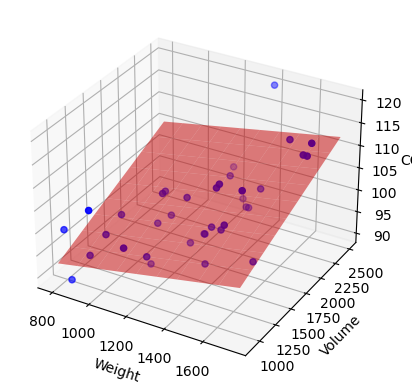

In [9]:
# Import the modules for plotting and linear algebra
# matplotlib.pyplot is a module that provides functions for creating and customizing various types of plots
# mpl_toolkits.mplot3d is a module that provides functions for creating and manipulating 3D plots
# numpy is a module that provides functions for performing numerical computations and linear algebra operations
import matplotlib.pyplot as plt
import numpy as np

# Read the data from a CSV file and store it in a pandas DataFrame object called df
# pandas is a module that provides functions for working with tabular data structures and performing data analysis
# pandas.read_csv() is a function that reads a CSV file and returns a DataFrame object, which is a two-dimensional table that can store different types of data in each column
# The first argument of pandas.read_csv() is the name of the CSV file, which contains the data about the cars and their CO2 emission
df = pandas.read_csv("data.csv")

# Select the columns "Weight", "Volume" and "CO2" from the DataFrame and assign them to variables called x, y and z
# x, y and z are one-dimensional arrays that contain the values of the independent and dependent variables
# The independent variables are the features that we use to predict the CO2 emission, which are the weight and volume of the cars
# The dependent variable is the target that we want to predict based on the features, which is the CO2 emission of the cars
# We can select a column from a DataFrame by using its name as an index, such as df["Weight"]
x = df["Weight"]
y = df["Volume"]
z = df["CO2"]

# Create a figure object and a 3D axes object
# A figure object is a container that holds one or more plots, which are visual representations of data
# An axes object is a region within a figure that contains one plot, which can have labels, ticks, legends, etc.
# plt.figure() is a function that creates and returns a new figure object
# fig.add_subplot() is a method that adds an axes object to a figure object at a specified position
# The first argument of fig.add_subplot() is an integer that specifies the number of rows, columns and index of the axes object within the figure grid
# For example, 111 means one row, one column and first position
# The second argument of fig.add_subplot() is a keyword argument that specifies the type of projection for the axes object
# For example, projection='3d' means a 3D projection that can display x, y and z coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the data points as blue dots
# ax.scatter() is a method that plots the data points as markers on the axes object
# The first three arguments of ax.scatter() are the x, y and z coordinates of the data points, which are stored in x, y and z arrays respectively
# The fourth argument of ax.scatter() is a keyword argument that specifies the color of the markers, which can be a single letter or a name
# For example, c='b' means blue color
# The fifth argument of ax.scatter() is a keyword argument that specifies the shape of the markers, which can be a single character or a name
# For example, marker='o' means circle shape
ax.scatter(x, y, z, c="b", marker="o")

# Create a grid of values for x and y using np.meshgrid()
# np.meshgrid() is a function that takes two one-dimensional arrays and returns two two-dimensional arrays that represent all possible combinations of values from the original arrays
# For example, np.meshgrid([1, 2], [3, 4]) returns [[1, 2], [1, 2]] and [[3, 3], [4, 4]]
# The first argument of np.meshgrid() is an array that contains the values for x coordinate, which we create using np.linspace()
# np.linspace() is a function that returns an array of evenly spaced numbers over a specified interval
# The first argument of np.linspace() is the start value of the interval, which we set to x.min(), which returns the minimum value in x array
# The second argument of np.linspace() is the end value of the interval, which we set to x.max(), which returns the maximum value in x array
# The third argument of np.linspace() is the number of samples to generate in the interval, which we set to 10 arbitrarily
xx, yy = np.meshgrid(
    np.linspace(x.min(), x.max(), 10), np.linspace(y.min(), y.max(), 10)
)

# Calculate the corresponding values of z using the linear equation
# zz is a two-dimensional array that contains the values of z coordinate, which we calculate using the linear equation that regr has found
# The linear equation is CO2 = 0.0076 * Weight + 0.0078 * Volume + 79.7, where CO2 is z, Weight is x and Volume is y
# We can use the * operator to perform element-wise multiplication between two arrays, and the + operator to perform element-wise addition between two arrays or an array and a scalar
zz = 0.0076 * xx + 0.0078 * yy + 79.7

# Plot the fit line as a red surface
# ax.plot_surface() is a method that plots a surface on the axes object
# The first three arguments of ax.plot_surface() are the x, y and z coordinates of the surface, which are stored in xx, yy and zz arrays respectively
# The fourth argument of ax.plot_surface() is a keyword argument that specifies the color of the surface, which can be a single letter or a name
# For example, color='r' means red color
# The fifth argument of ax.plot_surface() is a keyword argument that specifies the transparency of the surface, which can be a number between 0 and 1
# For example, alpha=0.5 means 50% transparency
ax.plot_surface(xx, yy, zz, color="r", alpha=0.5)

# Set the labels for the axes
# ax.set_xlabel(), ax.set_ylabel() and ax.set_zlabel() are methods that set the labels for the x, y and z axes respectively
# The first argument of these methods is a string that contains the text of the label
ax.set_xlabel("Weight")
ax.set_ylabel("Volume")
ax.set_zlabel("CO2")

# Show the plot
# plt.show() is a function that displays the figure object on the screen
plt.show()

To plot in R^3 with Python.

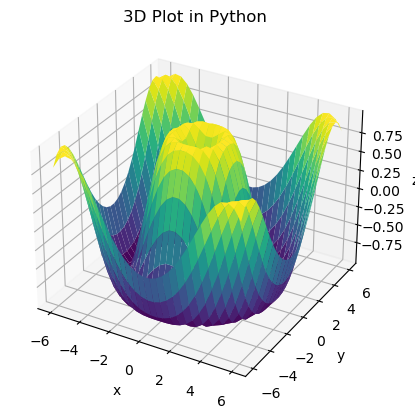

In [10]:
"""Here is an example code that plots the function z = sin(sqrt(x^2 + y^2)) in R^3:"""

# Import modules
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and an axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Define x and y values
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, y)


# Define the function f(x, y)
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))


# Calculate the z values
Z = f(X, Y)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap="viridis")

# Add labels and title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("3D Plot in Python")

# Show the plot
plt.show()

In [11]:
"""Useful function experiment"""

# import the numpy module as np
import numpy as np

# create an array of 3 evenly spaced numbers between -1 and 1 and assign it to x
x = np.linspace(-1, 1, 3)
# print the value of x
print("x = ", x)

# create an array of 5 evenly spaced numbers between -2 and 2 and assign it to y
y = np.linspace(-2, 2, 5)
# print the value of y
print("y = ", y)

# create two 2D arrays from x and y using meshgrid function
# meshgrid function returns coordinate matrices from coordinate vectors
# x_1 is a 2D array where each row is equal to x
# y_1 is a 2D array where each column is equal to y
x_1, y_1 = np.meshgrid(x, y)

# print the value of x_1
print("x_1 = ")
print(x_1)
# print the value of y_1
print("y_1 = ")
print(y_1)

x =  [-1.  0.  1.]
y =  [-2. -1.  0.  1.  2.]
x_1 = 
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
y_1 = 
[[-2. -2. -2.]
 [-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]]
